In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hirthickofficials
Your Kaggle Key: ··········


100%|██████████| 750M/750M [00:07<00:00, 108MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall

# Image dimensions
img_width, img_height = 150, 150

# Path to the main directory
train_data_dir = '/content/stanford-dogs-dataset/images'

# Image augmentation
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary',
    subset='validation')


Found 16464 images belonging to 1 classes.
Found 4116 images belonging to 1 classes.


In [ ]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

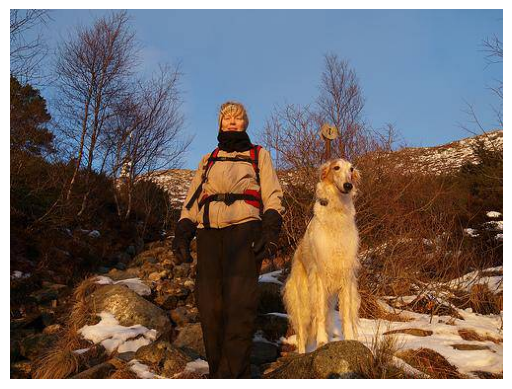

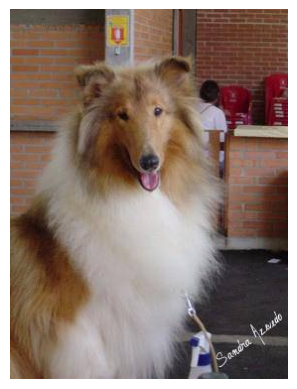

In [ ]:
import os
import matplotlib.pyplot as plt

directory = '/content/train'
files = os.listdir(directory)[:2]

for file in files:
    img = plt.imread(os.path.join(directory, file))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
# Define metrics
precision = Precision(name='precision')
recall = Recall(name='recall')

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall])

In [ ]:
def safe_image_generator(generator):
    while True:
        try:
            data, labels = next(generator)
            yield data, labels
        except Exception as e:
            print(f"Skipping a corrupted or unsupported image: {e}")

In [ ]:
train_generator_safe = safe_image_generator(train_generator)
validation_generator_safe = safe_image_generator(validation_generator)

In [ ]:
# Then use these safe generators in model.fit()
history = model.fit(
    train_generator_safe,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator_safe,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=2)


Epoch 1/2
 53/257 [=====>........................] - ETA: 7:26 - loss: 0.0148 - accuracy: 0.9820 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf


# Print the final evaluation metrics
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Final validation precision: {history.history['val_precision'][-1]}")
print(f"Final validation recall: {history.history['val_recall'][-1]}")
print(f"Final validation F1 score: {2*((history.history['val_precision'][-1]*history.history['val_recall'][-1])/(history.history['val_precision'][-1]+history.history['val_recall'][-1]+1e-7))}")



In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(model, image_path):
    img = image.load_img(image_path, target_size=(150, 150))

    img_array = image.img_to_array(img)

    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    predicted_class = int(prediction[0] > 0.5)

    labels = {0: 'Cat', 1: 'Dog'}
    print(f"Prediction: {labels[predicted_class]} - Raw output: {prediction[0]}")

predict_single_image(model, '/content/dog-and-cat-classification-dataset/PetImages/Dog/10000.jpg')
